<a href="https://colab.research.google.com/github/tortas/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/VGame_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [0]:
import seaborn as sns

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
from google.colab import files
uploaded = files.upload()

In [0]:
vg_sales = pd.read_csv('vgsalesGlobale.csv')
vg_sales = vg_sales.fillna(value={'Publisher': 'Unknown'})
vg_sales = vg_sales.dropna()
vg_sales['Year'] = vg_sales['Year'].astype(int)

In [29]:
vg_sales.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [0]:
vg_sales = vg_sales.drop(columns='Rank')

In [0]:
recent_vgsales = vg_sales[(vg_sales.Year <= 2016) & (vg_sales.Year >= 1996)]
recent_vgsales_by_year = recent_vgsales.groupby('Year').sum()

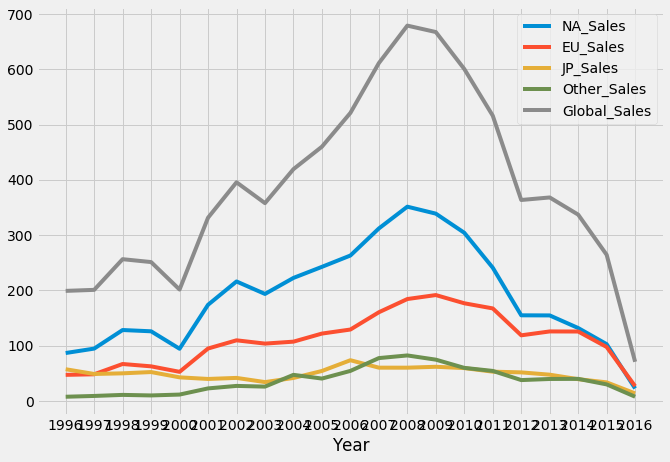

In [32]:
sales_year_graph = recent_vgsales_by_year.plot(xticks=range(1996,2017), figsize=(10,7));

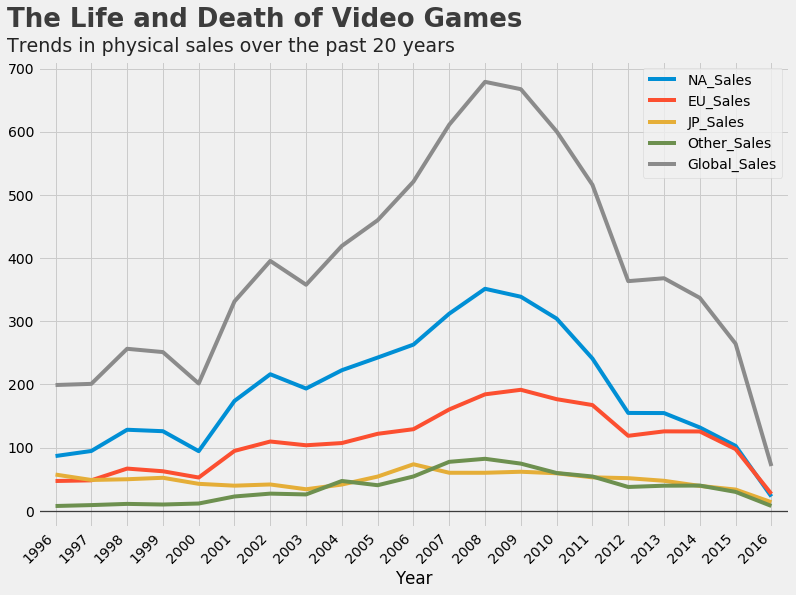

In [33]:
import matplotlib.style as style
style.use('fivethirtyeight')
fte_graph = recent_vgsales_by_year.plot(xticks=range(1996,2017), figsize=(12,8));
fte_graph.tick_params(axis='both', which='major', labelsize=14)
fte_graph.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
fte_graph.set_xlim(left = 1995.5, right = 2016.5)

fte_graph.text(x = 1994.65, y = 765.7, s = "The Life and Death of Video Games",
               fontsize = 26, weight = 'bold', alpha = .75);
fte_graph.text(x = 1994.65, y = 727,
               s = 'Trends in physical sales over the past 20 years',
              fontsize = 19, alpha = .85);

plt.xticks(horizontalalignment="right", rotation=45);

In [34]:
vg_sales[(vg_sales.Year >= 2000) & (vg_sales.Year <= 2002)].sort_values(by='NA_Sales', ascending=False).head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
24,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
38,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98
25,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85
129,Halo: Combat Evolved,XB,2001,Shooter,Microsoft Game Studios,4.98,1.30,0.08,0.07,6.43
107,Super Smash Bros. Melee,GC,2001,Fighting,Nintendo,4.41,1.04,1.39,0.22,7.07
135,Super Mario Sunshine,GC,2002,Platform,Nintendo,4.01,1.26,0.87,0.17,6.31
131,Kingdom Hearts,PS2,2002,Role-Playing,Sony Computer Entertainment,3.64,1.20,1.49,0.07,6.40
279,Madden NFL 2003,PS2,2002,Sports,Electronic Arts,3.36,0.21,0.01,0.56,4.14
164,Super Mario World,GBA,2001,Platform,Nintendo,3.21,1.11,0.95,0.20,5.46


In [35]:
sales0308 = vg_sales[(vg_sales.Year >= 2003) & (vg_sales.Year <= 2008)].sort_values(by='NA_Sales', ascending=False)
sales0308.head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
11,Mario Kart DS,DS,2005,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42
17,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
10,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
13,Wii Fit,Wii,2007,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
43,Halo 3,X360,2007,Shooter,Microsoft Game Studios,7.97,2.83,0.13,1.21,12.14
79,Halo 2,XB,2004,Shooter,Microsoft Game Studios,6.82,1.53,0.05,0.08,8.49


In [36]:
sales0308[sales0308['Publisher'] != 'Nintendo'].head(15)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
17,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
43,Halo 3,X360,2007,Shooter,Microsoft Game Studios,7.97,2.83,0.13,1.21,12.14
79,Halo 2,XB,2004,Shooter,Microsoft Game Studios,6.82,1.53,0.05,0.08,8.49
51,Grand Theft Auto IV,X360,2008,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.02
70,Call of Duty 4: Modern Warfare,X360,2007,Shooter,Activision,5.91,2.38,0.13,0.90,9.32
98,Call of Duty: World at War,X360,2008,Shooter,Activision,4.79,1.90,0.00,0.69,7.37
56,Grand Theft Auto IV,PS3,2008,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.57
238,Madden NFL 2005,PS2,2004,Sports,Electronic Arts,4.18,0.26,0.01,0.08,4.53
118,Gears of War 2,X360,2008,Shooter,Microsoft Game Studios,4.15,1.92,0.06,0.64,6.76
211,Madden NFL 06,PS2,2005,Sports,Electronic Arts,3.98,0.26,0.01,0.66,4.91


In [37]:
sales0308[sales0308['Publisher'] == 'Nintendo'].head(15)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
11,Mario Kart DS,DS,2005,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42
10,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
13,Wii Fit,Wii,2007,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
39,Super Smash Bros. Brawl,Wii,2008,Fighting,Nintendo,6.75,2.61,2.66,1.02,13.04
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
48,Super Mario Galaxy,Wii,2007,Platform,Nintendo,6.16,3.40,1.20,0.76,11.52


In [38]:
sales0308.groupby('Publisher').sum().sort_values(by='Global_Sales', ascending=False).reset_index().head(10)

,Publisher,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Nintendo,513402,265.45,180.49,133.50,47.66,627.27
1,Electronic Arts,1237505,247.49,112.96,5.82,51.55,418.03
2,Activision,730169,154.69,62.65,1.11,25.86,244.38
3,Sony Computer Entertainment,479345,79.14,55.42,11.51,37.78,183.85
4,Ubisoft,796432,100.51,51.80,2.73,16.86,172.09
5,THQ,738051,107.49,43.86,0.49,17.10,168.98
6,Take-Two Interactive,357080,82.02,37.46,1.90,26.22,147.55
7,Sega,511531,50.24,35.20,14.41,12.75,112.74
8,Konami Digital Entertainment,633864,36.97,30.26,24.95,16.44,108.72
9,Microsoft Game Studios,186473,49.41,22.72,1.40,6.12,79.68


In [0]:
sales_pt = pd.pivot_table(sales0308, 
                          index='Year',
                          columns='Publisher',
                          values='Global_Sales',
                          aggfunc=np.sum)
# sales_pt = sales_pt.drop(columns=['DC', 'PS', 'PC'])
my_colors = ['royalblue', 'orangered', 'darkorange', 'forestgreen',
             'purple', 'orchid', 'crimson', 'chocolate', 'slategrey']
# print(sales_pt)
# sales_pt.head().plot.bar(stacked=True, figsize=(12,8), color=my_colors)

In [40]:
recent_vgsales_by_platform = recent_vgsales.groupby('Platform').sum().drop(columns=['Rank', 'Year'])
recent_vgsales_by_platform.sort_values(by='Global_Sales', ascending=False).head().plot(kind='bar')

KeyError: ignored

In [0]:
year_groups = vg_sales[(vg_sales.Year < 2017) & (vg_sales.Year > 2011)].groupby(['Year', 'Genre'])
year_genre_df = year_groups.sum()
year_genre_df = year_genre_df.drop(columns='Rank')
year_genre_df.head()

In [0]:
unstacked = year_genre_df.unstack()
unstacked

In [0]:
unstacked.NA_Sales

In [0]:
unstacked.NA_Sales.sort_values(by=plot.bar(stacked=True, figsize=(10,7))